In [78]:
from warnings import filterwarnings
filterwarnings('ignore')

In [79]:
#Read  the train dataset
import pandas as pd
df = pd.read_csv('training_set.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
#step2:perform basic data quality check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
#step 3:separate x and y(saleprice) features
x = df.drop(columns=['Id','SalePrice'])
y = df[['SalePrice']]

In [84]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [85]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [86]:
#seperate cat and con feautres
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [87]:
#step 4:create preprocessing feature selection pipeline for x
#cat=ordinal encoding
from sklearn.pipeline import Pipeline #automated preprocessing
from sklearn.impute import SimpleImputer #replacing missing value
from sklearn.preprocessing import StandardScaler,OrdinalEncoder #preprocessing
from sklearn.compose import ColumnTransformer #To combine numerical and categorical

In [88]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [89]:
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Not_Avail')),
                            ('ordinal',OrdinalEncoder())])

In [90]:
pre1 =ColumnTransformer([('num',num_pipe1,con),  #to merge cat and con features
                         ('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [91]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath'...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [92]:
x_pre = pre1.fit_transform(x)
x_pre

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1456,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,...,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0
1457,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,0.0,3.0,8.0,4.0
1458,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,...,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr = LinearRegression()
sel = SequentialFeatureSelector(estimator=lr,direction='backward',
                                n_features_to_select='auto')
sel.fit_transform(x_pre,y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__1stFlrSF',
       'num__2ndFlrSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__EnclosedPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__YrSold', 'cat__MSZoning', 'cat__Street', 'cat__LandContour',
       'cat__Neighborhood', 'cat__RoofMatl', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__Foundation', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__HeatingQC',
       'cat__KitchenQual', 'cat__Functional', 'cat__FireplaceQu',
       'cat__GarageFinish', 'cat__GarageQual', 'cat__SaleCondition'],
      dtype=object)

In [94]:
len(sel_cols)#to check how many columns are selected after feature selection

40

In [95]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [96]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [97]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'MSZoning',
 'Street',
 'LandContour',
 'Neighborhood',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'SaleCondition']

In [98]:
x_sel=x[imp_cols]
x_sel.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,SaleCondition
0,60,8450,7,5,2003,196.0,0,150,856,854,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,Normal
1,20,9600,6,8,1976,0.0,0,284,1262,0,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,Normal
2,60,11250,7,5,2001,162.0,0,434,920,866,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,Normal
3,70,9550,7,5,1915,0.0,0,540,961,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,Abnorml
4,60,14260,8,5,2000,350.0,0,490,1145,1053,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,Normal


In [99]:
#create the final pipeline
#cat features - Ohe
cat_sel = list(x_sel.columns[x_sel.dtypes=='object'])
con_sel = list(x_sel.columns[x_sel.dtypes!='object'])

In [100]:
cat_sel


['MSZoning',
 'Street',
 'LandContour',
 'Neighborhood',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'SaleCondition']

In [101]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [104]:
cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Not_Avail')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [105]:
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [106]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'...
                                                  SimpleImputer(fill_value='Not_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Street', 'LandContour',
                                  'Neighborhood', 'RoofMatl', 'MasVnrType',
                                  'ExterQual', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'FireplaceQu',
                                  'GarageFinish', 'GarageQual',
                                  'SaleCondition'])])

In [107]:
x_sel_pre = pre2.fit_transform(x_sel)
x_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Not_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,-0.288653,-0.944591,-0.793434,1.161852,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,-0.288653,-0.641228,0.257140,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,-0.288653,-0.301643,-0.627826,1.189351,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.288653,-0.061670,-0.521734,0.937276,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,-0.288653,-0.174865,-0.045611,1.617877,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
#Apply train test split
#20%unseen
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_sel_pre,y,test_size=0.2,random_state=21)

In [109]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Not_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.288653,-0.672923,-1.122062,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,-0.288653,-1.284176,-1.049608,0.504166,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.213629,0.250749,0.427923,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.436865,-0.901577,-0.369064,1.109145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.288653,2.179592,1.012726,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [110]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [111]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Not_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,-0.288653,-1.035147,-0.187930,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,-0.288653,-0.573311,0.060481,1.038106,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.288653,2.550871,1.374993,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,-0.288653,-0.174865,0.707387,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.288653,0.345832,-1.145350,0.286466,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [112]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [113]:
#step 5:model building and evaluation
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [114]:
model1.score(xtrain,ytrain)

0.9213420300923814

In [115]:
model1.score(xtest,ytest)

0.8206539968581074

In [116]:
#build ridge and lasso 
#there is large difference between train and test
#if you dont know which alpha value to select then follow below step
import numpy as np
params = {'alpha':np.arange(start=1,stop=1000,step=1)}
params

{'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [117]:
#Ridge model with tunning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
rr =Ridge()
gscv_ridge = GridSearchCV(rr,param_grid=params,scoring='neg_mean_squared_error',cv=5)
gscv_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [118]:
#for best alpha value
gscv_ridge.best_params_

{'alpha': 15}

In [119]:
#forbest score
gscv_ridge.best_score_

-960321411.2397997

In [120]:
#to get r2 score
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=15)

In [121]:
#Check result for train
best_ridge.score(xtrain,ytrain)

0.8855579038229714

In [122]:
#check result for test
best_ridge.score(xtest,ytest)

0.8373943427491882

In [123]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(best_ridge,xtrain,ytrain,cv=5,scoring='r2')
scores1

array([0.67545785, 0.8532272 , 0.90149633, 0.88064285, 0.92376826])

In [124]:
scores1.mean()

0.846918500160092

In [125]:
#Lasso Model
from sklearn.linear_model import Lasso
ls = Lasso()
gscv_lasso = GridSearchCV(ls,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [126]:
gscv_lasso.best_params_

{'alpha': 113}

In [127]:
gscv_lasso.best_score_

-929540173.3311945

In [128]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=113)

In [129]:
best_lasso.score(xtrain,ytrain)

0.9116857967778242

In [130]:
best_lasso.score(xtest,ytest)

0.8287595739479241

In [131]:
scores2 = cross_val_score(best_lasso,xtrain,ytrain, cv=5, scoring='r2')
scores2

array([0.676096  , 0.86930821, 0.9059145 , 0.88162369, 0.92777514])

In [132]:
scores2.mean()

0.8521435077243986

In [133]:
#Evaluating all other metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [134]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [135]:
# Evaluate for ridge
print('Ridge Train Results :')
evaluate_model(best_ridge, xtrain, ytrain)
print('\n==========================================\n')
print('Ridge Test Results : ')
evaluate_model(best_ridge, xtest, ytest)

Ridge Train Results :
Mean Squared Error : 708273609.75
Root Mean Squared Error : 26613.41
Mean Absolute Error : 15987.78
R2 Score : 0.8856


Ridge Test Results : 
Mean Squared Error : 1102029269.40
Root Mean Squared Error : 33196.83
Mean Absolute Error : 17317.07
R2 Score : 0.8374


In [136]:
# Evaluate the Lasso model
print('Lasso Train Results :')
evaluate_model(best_lasso, xtrain, ytrain)
print('\n==========================================\n')
print('Lasso Test Results : ')
evaluate_model(best_lasso, xtest, ytest)

Lasso Train Results :
Mean Squared Error : 546570026.22
Root Mean Squared Error : 23378.84
Mean Absolute Error : 15560.17
R2 Score : 0.9117


Lasso Test Results : 
Mean Squared Error : 1160549791.47
Root Mean Squared Error : 34066.84
Mean Absolute Error : 17091.88
R2 Score : 0.8288


Based on r2 score higest test result is for Lasso , Hence seleting lasso for out of sample predictions

In [137]:
#Step 6: Perform out of sample predictions
#use best_lasso model

xnew = pd.read_csv('sample_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [138]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
                                  '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'...
                                                  SimpleImputer(fill_value='Not_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MSZoning', 'Street', 'LandContour',
                                  'Neighborhood', 'RoofMatl', 'MasVnrType',
                                  'ExterQual', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'HeatingQC',
                                  'KitchenQual', 'Functional', 'FireplaceQu',
                                  'GarageFinish', 'GarageQual',
                                  'SaleCondition'])])

In [139]:
#On out of sample data always apply pre.transform
xnew_pre = pre2.transform(xnew)

In [140]:
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,...,cat__GarageQual_Gd,cat__GarageQual_Not_Avail,cat__GarageQual_Po,cat__GarageQual_TA,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.604293,-0.672923,-0.689929,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,-0.288653,-0.365032,0.430511,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,-0.288653,-0.974021,-0.607125,0.811239,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,-0.288653,-0.550672,-0.612300,0.758532,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.288653,1.018211,0.303718,-0.795163,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
#predicting house prices
preds = best_lasso.predict(xnew_pre)
preds

array([115077.31800663, 149781.98824959, 175214.67818969, ...,
       163581.09282951, 114774.93430834, 219096.50005171])

In [142]:
#save above in dataframe
df_final = xnew[['Id']]
df_final.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [143]:
df_final['SalePrice_est']=preds

In [144]:
df_final

,Id,SalePrice_est
0,1461,115077.318007
1,1462,149781.988250
2,1463,175214.678190
3,1464,182532.864366
4,1465,200279.221855
...,...,...
1454,2915,87598.366216
1455,2916,73204.742919
1456,2917,163581.092830
1457,2918,114774.934308


<Axes: xlabel='SalePrice_est', ylabel='Count'>

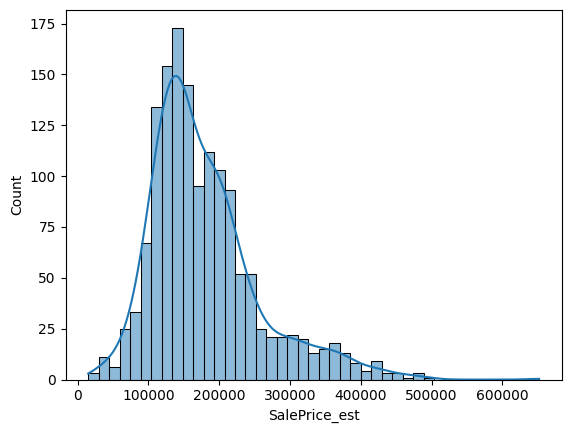

In [145]:
import seaborn as sns
sns.histplot(data=df_final, x='SalePrice_est', kde=True)

In [146]:
df_final.to_csv('Results.csv', index=False)